/Volumes/SSD_01/00_Python課程專用/PythonAI_Web_20231217/D91_書籍範例/02_Python:加密貨幣CTA量化交易111個實戰技巧/範例程式碼_20231218/historical_data.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old_ts = file_data.iloc[-1][0]
/var/folders/vm/_zft15050r7cfh47y6v5z4k40000gn/T/ipykernel_46010/2072993567.py:12: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.data["position"].fillna(method="ffill", inplace=True)


總績效(來回成本0.001):0.5416
交易次數:86
平均績效(來回成本0.001):0.0063
勝率:0.314
賺賠比:2.5563
賠率:1.1698
期望值:0.1165
獲勝持有時間:21 days 00:53:20
虧損持有時間:8 days 05:35:35.593220339
MDD:0.7002


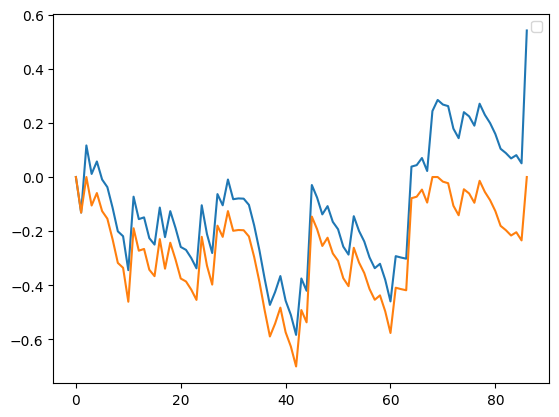

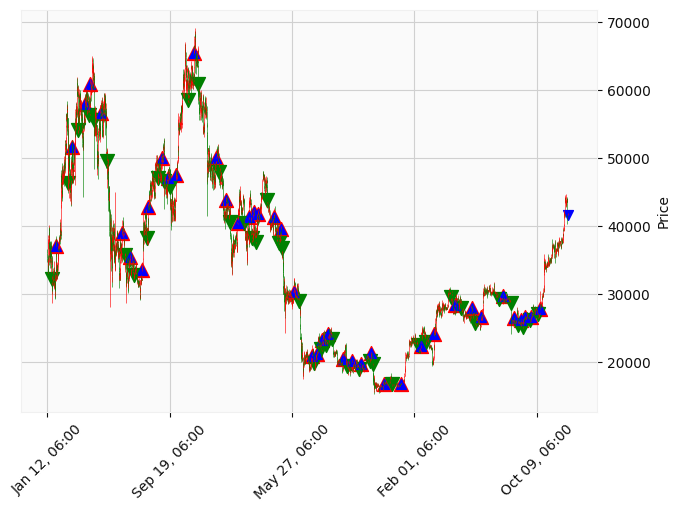

In [1]:
from backtest_class import Backtest


def run_strategy(
    self,
):
    self.data["position"] = None
    self.data["ceil"] = self.data.rolling(20)["high"].max().shift(1)
    self.data["floor"] = self.data.rolling(20)["low"].min().shift(1)
    self.data.loc[self.data["close"] > self.data["ceil"], "position"] = 1
    self.data.loc[self.data["close"] < self.data["floor"], "position"] = -1
    self.data["position"].fillna(method="ffill", inplace=True)


symbol = "BTCBUSD"
interval = "6h"
Backtest.run_strategy = run_strategy
backtest = Backtest(symbol, interval)
backtest.run_strategy()
backtest.performance(cost=0.001)
backtest.equity_curve()
backtest.plot_order()
